In [ ]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

In [ ]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("content/scripts")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=3)

##Source code from Github 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.3414153150423768


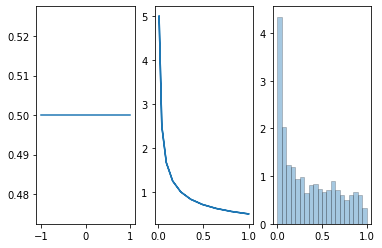

In [ ]:
import numpy as np
xs = np.linspace(-1,1,21)
a = -1
b = 1
px = 1/(b-a) * np.ones(len(xs))

fn = lambda x: x**2
ys = fn(xs)

#analytic
ppy = 1/(2*np.sqrt(ys))

#monte carlo
n = 1000
np.random.seed(42)
samples = np.random.uniform(a,b, size=n)
samples2 = fn(samples)

print(np.mean(samples2))

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].plot(xs, px, "-")
ax[1].plot(ys, ppy, "-")
sns.distplot(samples2, kde=False, ax=ax[2], bins=20, norm_hist=True, hist_kws=dict(edgecolor="k", linewidth=0.5))
plt.savefig("/content/changeOfVars.pdf")
plt.show()

## Using JAX

0.34349513


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


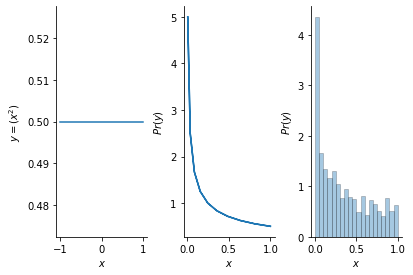

In [ ]:
xs = jnp.linspace(-1,1,21)
a = -1
b = 1
px = 1/(b-a) * jnp.ones(len(xs))

fn = lambda x: x**2
ys = fn(xs)

#analytic
ppy = 1/(2*jnp.sqrt(ys))

#monte carlo
n = 1000
r=jax.random.PRNGKey(42)
samples = jax.random.uniform(key=r,shape=(n,),minval=a,maxval=b)
samples2 = fn(samples)

print(jnp.mean(samples2))

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].plot(xs, px, "-")

ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y=(x^2)$")
ax[1].plot(ys, ppy, "-")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$Pr(y)$")
sns.distplot(samples2, kde=False, ax=ax[2], bins=20, norm_hist=True, hist_kws=dict(edgecolor="k", linewidth=0.5))
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$Pr(y)$")
sns.despine()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig("/content/changeOfVars2.pdf")
plt.show()
